In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import cv2
from mnist import MNIST

## Loading and Preprocessing data

In [12]:
mndata = MNIST("datasets/mnist")

# Training split
train_images, train_labels = mndata.load_training()

# Test split
test_images, test_labels = mndata.load_testing()

In [36]:
mnist_img_size = (28, 28)
mnist_classes = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Converting to numpy arrays, normalizing
# train_images = np.expand_dims(np.array(train_images).reshape(-1, mnist_img_size[0], mnist_img_size[1]), 
# axis=-1) / 255.0
train_images = np.array(train_images).reshape(-1, mnist_img_size[0], mnist_img_size[1]) / 255.0
train_labels = np.array(train_labels)

# test_images = np.expand_dims(np.array(test_images).reshape(-1, mnist_img_size[0], mnist_img_size[1]), 
# axis=-1) / 255.0
test_images = np.array(test_images).reshape(-1, mnist_img_size[0], mnist_img_size[1]) / 255.0
test_labels = np.array(test_labels)

In [37]:
test_images.shape

(10000, 28, 28)

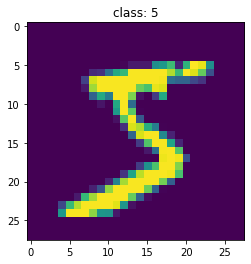

In [15]:
# Sample output
idx = 0
plt.imshow(train_images[idx, :, :])
plt.title(f"class: {train_labels[idx]}")
plt.show()

## Defining Autoencoder

In [65]:
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.latent_dim = 64
        self.encoder = self.create_encoder(self.latent_dim)
        self.decoder = self.create_decoder(self.latent_dim)

    @staticmethod
    def create_encoder(latent_dim):
        # encoder = tf.keras.Sequential([
        #     layers.Flatten(),
        #     layers.Dense(latent_dim, activation='relu'),])

        # Encoder
        # encoder_input = tf.keras.Input(shape=(28, 28, 1))
        # x = layers.Conv2D(32, 3, strides= 2, activation= "relu", padding= "same")(encoder_input)
        # x = layers.Conv2D(64, 3, strides= 2, activation= "relu", padding= "same")(x)
        # x = layers.Flatten()(x)

        encoder_input = tf.keras.Input(shape=(28, 28,))
        x = layers.Flatten()(encoder_input)
        x = layers.Dense(latent_dim, activation='relu')(x)

        encoder = tf.keras.Model(encoder_input, x)

        return encoder
    
    @staticmethod
    def create_decoder(latent_dim):
        # decoder = tf.keras.Sequential([
        #     layers.Dense(784, activation='sigmoid'),
        #     layers.Reshape((28, 28))])

        # Decoder
        # latent_input = tf.keras.Input(shape=(latent_dim,))
        # y = layers.Dense(7*7*64, activation="relu")(latent_input)
        # y = layers.Reshape((7, 7, 64))(y)
        # y = layers.Conv2DTranspose(32, 3, strides= 2, activation= "relu", padding= "same")(y)
        # y = layers.Conv2DTranspose(1, 3, strides= 2, activation= "sigmoid", padding= "same")(y)
        
        latent_input = tf.keras.Input(shape=(latent_dim,))
        y = layers.Dense(784, activation="sigmoid")(latent_input)
        y = layers.Reshape((28, 28))(y)

        decoder = tf.keras.Model(latent_input, y)

        return decoder
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return decoded

In [66]:
autoencoder = AutoEncoder()

In [67]:
autoencoder.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [68]:
autoencoder.fit(train_images, train_images, epochs = 1)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0142


In [69]:
autoencoder.summary()

Model: "auto_encoder_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_10 (Model)             (None, 64)                50240     
_________________________________________________________________
model_11 (Model)             (None, 28, 28)            50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
